In [1]:
from pathlib import Path
import pandas as pd
import numpy
from scipy.spatial.distance import pdist
from seriate import seriate

import seaborn as sns
import matplotlib.pyplot as plt
from definitions import ROOT_DIR

In [2]:
p = Path(ROOT_DIR)
p_analysis = p / "additional_plots" / "predictions" 
p_data = p_analysis / "avg_model_predictions.csv"

In [3]:
df = pd.read_csv(p_data, index_col=0)

In [4]:
df['combined_prediciton'] = df.prediction_regression * df.prediction_classification

<AxesSubplot:xlabel='Molecule name', ylabel='matrix-polarity'>

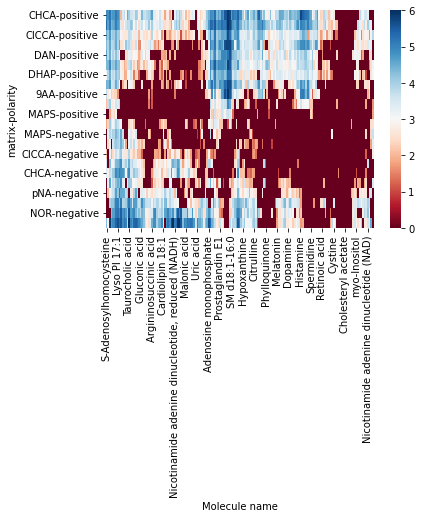

In [7]:
# Experimental data
obs= df.pivot_table(index = ['matrix', 'polarity'],
                            columns = 'Molecule name',
                            values = 'observed_value',
                            fill_value=0)

obs_array = obs.to_numpy()
row_order = seriate(pdist(obs_array))
col_order = seriate(pdist(obs_array.T))

ordered_obs = obs.reindex(index=obs.index[[row_order]],
                         columns=obs.columns[[col_order]])
sns.heatmap(data=ordered_obs, cmap='RdBu', vmax=6)

<AxesSubplot:xlabel='Molecule name', ylabel='matrix-polarity'>

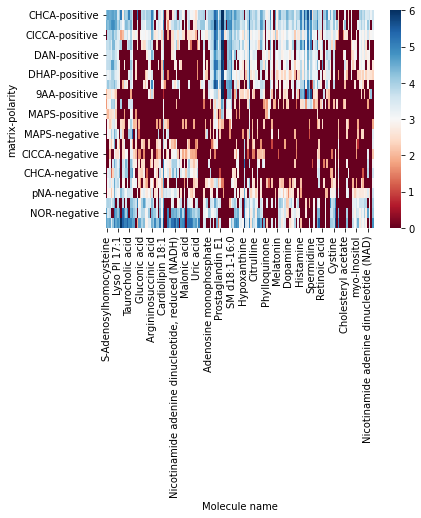

In [8]:
# Prediction result
calc= df.pivot_table(index = ['matrix', 'polarity'],
                            columns = 'Molecule name',
                            values = 'combined_prediciton',
                            fill_value=0)

ordered_calc = calc.reindex(index=calc.index[[row_order]],
                         columns=calc.columns[[col_order]])
sns.heatmap(data=ordered_calc, cmap='RdBu', vmax=6)

In [17]:
obs= df.pivot_table(index = ['matrix', 'polarity'],
                            columns = 'Molecule name',
                            values = 'observed_value',
                            aggfunc=lambda x: x>0,
                            fill_value=False)

In [16]:
calc= df.pivot_table(index = ['matrix', 'polarity'],
                            columns = 'Molecule name',
                            values = 'prediction_classification',
                             aggfunc=lambda x: x>0,
                            fill_value=False)

<AxesSubplot:xlabel='Molecule name', ylabel='matrix-polarity'>

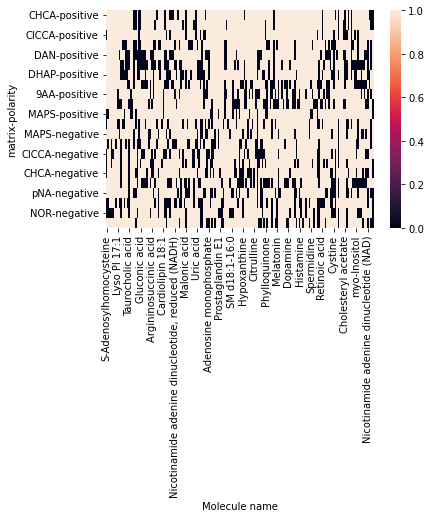

In [26]:
# Show correct classifications
test = obs == calc

ordered_test = test.reindex(index=calc.index[[row_order]],
                         columns=calc.columns[[col_order]])
sns.heatmap(data=ordered_test, vmax=1)